**# PROJECT OBJECTIV**

*# Develop a quantitative model that:*

Design and evaluate a data-driven investment strategy that minimizes portfolio risk while providing clients with clear, evidence-based allocation recommendations.

- Analyzes the historical returns of a selected NEV brand group of assets (e.g., Tesla, NIO, BYD, XPeng).

- Estimates the optimal portfolio weights that minimize risk (variance).

- Applies bootstrapping to assess the robustness and uncertainty of the allocation strategy.

- Presents results in a clear, business-friendly format for use by financial advisors or investment teams.



### Methods to be Used

- Mean-Variance Portfolio Optimization

- Bootstrapping (500 resamples) to assess stability

- Covariance Matrix Estimation

- Optional extension: Historical simulation of returns


### Business Impact

- This analysis allows the firm to:

- Provide risk-adjusted portfolio recommendations

- Show clients confidence intervals for asset weights

- Support compliance and transparency with data-backed strategies

- Increase trust through quantitative insights in volatile sectors like EV stocks


**# Our Goal:**

**# Create a bootstrapping strategy in portfolio project (to find optimal stock weighting minimizing variance).**

- Predict the trend of each stock for the next 3 months.

- Give Python code to achieve all this.

Plan of Action: We’ll do two things:


**# Part 1: Portfolio Optimization Using Bootstrapping** Use daily "Price" from all 4 stocks**

- Calculate daily returns

- Estimate the optimal allocation across 4 stocks to minimize portfolio variance

- Bootstrap to get standard error of allocation weights


In [ ]:
# Step 0: Import Libraries and Define File Paths

In [ ]:
# Step 1: Load and Preprocess the Data

In [2]:
import pandas as pd
import numpy as np

# Define your local file paths to datasets with technical indicators
file_paths = {
    "Tesla": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Tesla_with_Manual_Indicators.csv",
    "NIO": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Nio_with_Manual_Indicators.csv",
    "BYD": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\BYD_with_Manual_Indicators.csv",
    "XPeng": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\XPeng_with_Manual_Indicators.csv"
}

# Preprocessing function for local enhanced data
def preprocess_data(path):
    df = pd.read_csv(path, parse_dates=["Date"])
    df = df.sort_values("Date")
    df['Price'] = pd.to_numeric(df['Close'], errors='coerce')  # Use 'Close' as base price
    df['Return'] = df['Price'].pct_change()
    df.dropna(inplace=True)
    return df

# Load all enhanced data into a dictionary
dataframes = {name: preprocess_data(path) for name, path in file_paths.items()}



In [4]:
# Check if Tesla data loaded correctly
print("Tesla sample:")
print(dataframes["Tesla"].head(10))


Tesla sample:
    Unnamed: 0                Date     Open      High      Low   Close  \
19          19 2023-09-01 04:00:00  257.260  259.0794  242.010  245.01   
20          20 2023-09-05 04:00:00  245.000  258.0000  244.860  256.49   
21          21 2023-09-06 04:00:00  255.135  255.3900  245.060  251.92   
22          22 2023-09-07 04:00:00  245.070  252.8100  243.265  251.49   
23          23 2023-09-08 04:00:00  251.220  256.5200  246.670  248.50   
24          24 2023-09-11 04:00:00  264.270  274.8500  260.610  273.58   
25          25 2023-09-12 04:00:00  270.760  278.3900  266.600  267.48   
26          26 2023-09-13 04:00:00  270.070  274.9800  268.100  271.30   
27          27 2023-09-14 04:00:00  271.320  276.7094  270.420  276.04   
28          28 2023-09-15 04:00:00  277.550  278.9800  271.000  274.39   

         Volume    SMA_20     RSI_14      MACD  MACD_Signal   Price    Return  
19  132481248.0  239.5155  52.788696  0.838000    -2.010886  245.01 -0.050643  
20  1294554

In [6]:
# Check if NIO data loaded correctly
print("BYD sample:")
print(dataframes["BYD"].head(10))

BYD sample:
    Unnamed: 0                Date     Open     High      Low    Close  \
19          19 2023-09-01 04:00:00  10.5183  10.8067  10.5183  10.6717   
20          20 2023-09-05 04:00:00  10.7000  10.7000  10.5367  10.5950   
21          21 2023-09-06 04:00:00  10.5950  10.6917  10.5950  10.6517   
22          22 2023-09-07 04:00:00  10.4900  10.4900  10.3633  10.4300   
23          23 2023-09-08 04:00:00  10.5983  10.5983  10.3000  10.3483   
24          24 2023-09-11 04:00:00  10.5100  10.6333  10.5100  10.6017   
25          25 2023-09-12 04:00:00  10.8033  10.9500  10.7733  10.9367   
26          26 2023-09-13 04:00:00  10.6000  10.6267  10.5517  10.5667   
27          27 2023-09-14 04:00:00  10.5166  10.5167  10.4217  10.4833   
28          28 2023-09-15 04:00:00  10.4350  10.5333  10.4317  10.4767   

       Volume     SMA_20     RSI_14      MACD  MACD_Signal    Price    Return  
19  1182162.0  10.136580  60.740127 -0.200228    -0.352288  10.6717  0.014102  
20  1584996.0

In [8]:
# Check if NIO data loaded correctly
print("NIO sample:")
print(dataframes["NIO"].head(10))


NIO sample:
    Unnamed: 0                Date   Open   High     Low  Close      Volume  \
19          19 2023-09-01 04:00:00  10.53  11.35  10.500  11.00  77014589.0   
20          20 2023-09-05 04:00:00  10.73  11.18  10.720  10.81  37911836.0   
21          21 2023-09-06 04:00:00  10.71  10.91  10.470  10.58  31426073.0   
22          22 2023-09-07 04:00:00  10.17  10.27   9.930  10.08  44603828.0   
23          23 2023-09-08 04:00:00  10.06  10.15   9.920  10.04  26236138.0   
24          24 2023-09-11 04:00:00  10.39  10.43  10.020  10.33  31145664.0   
25          25 2023-09-12 04:00:00  10.23  10.88  10.210  10.57  38296977.0   
26          26 2023-09-13 04:00:00  10.20  10.47  10.060  10.07  36890018.0   
27          27 2023-09-14 04:00:00  10.15  10.38  10.135  10.38  26475948.0   
28          28 2023-09-15 04:00:00  10.53  10.72  10.290  10.43  40105904.0   

     SMA_20     RSI_14      MACD  MACD_Signal  Price    Return  
19  11.7160  33.478261 -0.931076    -0.946244  11.00 

In [10]:
# Check if NIO data loaded correctly
print("XPeng sample:")
print(dataframes["XPeng"].head(10))

XPeng sample:
    Unnamed: 0                Date   Open     High      Low  Close  \
19          19 2023-09-01 04:00:00  18.35  19.9600  18.1200  18.71   
20          20 2023-09-05 04:00:00  18.68  19.8512  18.6300  18.75   
21          21 2023-09-06 04:00:00  18.90  19.2500  18.5209  18.95   
22          22 2023-09-07 04:00:00  18.20  18.2000  17.3100  17.46   
23          23 2023-09-08 04:00:00  17.50  17.7027  17.2050  17.35   
24          24 2023-09-11 04:00:00  18.22  18.6300  17.9600  18.48   
25          25 2023-09-12 04:00:00  18.26  19.0400  18.2600  18.65   
26          26 2023-09-13 04:00:00  18.04  18.3785  17.9500  18.07   
27          27 2023-09-14 04:00:00  18.08  18.5100  18.0750  18.35   
28          28 2023-09-15 04:00:00  18.52  18.7000  18.0100  18.30   

        Volume   SMA_20     RSI_14      MACD  MACD_Signal  Price    Return  
19  32432666.0  17.0065  64.018161  0.109364    -0.236290  18.71  0.051714  
20  17361923.0  17.0090  65.137615  0.186026    -0.151827  18

In [ ]:
# Step 2: Merge Returns from Tesla, BYD, NIO, XPeng.

In [22]:
# Merge with outer join
combined_returns = dataframes["Tesla"][['Date', 'Return']].rename(columns={'Return': 'Tesla'})

for name in ['BYD', 'NIO', 'XPeng']:
    combined_returns = combined_returns.merge(
        dataframes[name][['Date', 'Return']].rename(columns={'Return': name}),
        on='Date',
        how='outer'  # 🔁 broader date range
    )

# Sort and fill missing returns
combined_returns = combined_returns.sort_values('Date')
combined_returns.set_index('Date', inplace=True)
combined_returns.ffill(inplace=True) # or use .interpolate()

# Get last 30 days
recent_returns = combined_returns.tail(30)
print("✅ Combined Returns (last 30 rows):")
print(recent_returns)


✅ Combined Returns (last 30 rows):
                        Tesla       BYD       NIO     XPeng
Date                                                       
2025-06-23 04:00:00  0.082319  0.004826  0.005865  0.046969
2025-06-24 04:00:00 -0.023546  0.041673  0.020408  0.035472
2025-06-25 04:00:00 -0.037948 -0.022802 -0.008571 -0.032746
2025-06-26 04:00:00 -0.005404 -0.028819 -0.014409 -0.065104
2025-06-27 04:00:00 -0.006600 -0.010756  0.011696  0.010028
2025-06-30 04:00:00 -0.018447 -0.009403 -0.008671 -0.013789
2025-07-01 04:00:00 -0.053359  0.000429  0.023324  0.021253
2025-07-02 04:00:00  0.049682 -0.005435 -0.008547  0.006024
2025-07-03 04:00:00 -0.000950  0.004069  0.008621  0.026130
2025-07-07 04:00:00 -0.067893 -0.015578 -0.028490 -0.049867
2025-07-08 04:00:00  0.013166  0.016260  0.026393  0.001117
2025-07-09 04:00:00 -0.006481 -0.011731 -0.005714 -0.015616
2025-07-10 04:00:00  0.047283 -0.010038  0.060345 -0.012465
2025-07-11 04:00:00  0.011747  0.001197  0.056911 -0.001721
2025-

In [ ]:
# Step 3: Portfolio Optimization (Minimize Variance)，Compute Optimal Weights

**# We’ll use the mean-variance optimization formula to compute the optimal weights that minimize total portfolio variance (risk), assuming no return constraints.**

In [44]:
import pandas as pd
import numpy as np

# Step 1: Define file paths for enhanced datasets with indicators
file_paths = {
    "Tesla": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Tesla_with_Manual_Indicators.csv",
    "NIO": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\NIO_with_Manual_Indicators.csv",
    "BYD": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\BYD_with_Manual_Indicators.csv",
    "XPeng": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\XPeng_with_Manual_Indicators.csv"
}

# Step 2: Preprocessing function (adds 'Return' and sorts by 'Date')
def preprocess_data(path):
    df = pd.read_csv(path, parse_dates=["Date"])
    df = df.sort_values("Date").reset_index(drop=True)
    
    # Calculate daily return from 'Close' price
    df['Return'] = df['Close'].pct_change()
    
    # Drop initial row with NaN return
    df.dropna(subset=['Return'], inplace=True)
    
    return df

# Step 3: Load and preprocess all datasets
dataframes = {name: preprocess_data(path) for name, path in file_paths.items()}

# Step 4: Show structure and most recent rows for validation
for name, df in dataframes.items():
    print(f"\n✅ Columns for {name}:")
    print(df.columns.tolist())
    print(f"\n🔎 Latest 5 rows of {name}:")
    print(df.tail())




✅ Columns for Tesla:
['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'Return']

🔎 Latest 5 rows of Tesla:
     Unnamed: 0                Date     Open      High       Low   Close  \
495         495 2025-07-29 04:00:00  325.550  326.2500  318.2500  321.20   
496         496 2025-07-30 04:00:00  322.180  324.4499  311.6164  319.04   
497         497 2025-07-31 04:00:00  319.605  321.3700  306.1000  308.27   
498         498 2025-08-01 04:00:00  306.205  309.3100  297.8200  302.63   
499         499 2025-08-04 04:00:00  309.080  312.1186  303.0001  309.26   

         Volume    SMA_20     RSI_14      MACD  MACD_Signal    Return  
495  87358861.0  315.1220  61.754875  1.041655     0.430879 -0.013483  
496  83931942.0  316.0385  54.782518  0.861696     0.517043 -0.006725  
497  85270919.0  315.6695  47.456311 -0.148263     0.383981 -0.033758  
498  89121446.0  315.0335  43.220903 -1.387767     0.029632 -0.018296  
499  78683905.0 

In [46]:
# ✅ Step 2: Merge returns by date using enhanced dataframes

# Start with Tesla
combined_returns = dataframes["Tesla"][["Date", "Return"]].rename(columns={"Return": "Tesla"})

# Merge returns from the other stocks
for name in ["BYD", "NIO", "XPeng"]:
    combined_returns = combined_returns.merge(
        dataframes[name][["Date", "Return"]].rename(columns={"Return": name}),
        on="Date",
        how="inner"  # Only keep dates common across all 4 stocks
    )

# Convert 'Date' to datetime and set it as index
combined_returns["Date"] = pd.to_datetime(combined_returns["Date"])
combined_returns.set_index("Date", inplace=True)

# Final preview
print("✅ Combined Returns (last 5 rows):")
print(combined_returns.tail())


✅ Combined Returns (last 5 rows):
                        Tesla       BYD       NIO     XPeng
Date                                                       
2025-07-29 04:00:00 -0.013483 -0.005097 -0.024845 -0.028511
2025-07-30 04:00:00 -0.006725 -0.046732 -0.042463 -0.020109
2025-07-31 04:00:00 -0.033758 -0.045603  0.079823  0.009983
2025-08-01 04:00:00 -0.018296 -0.027304  0.028747 -0.008786
2025-08-04 04:00:00  0.021908  0.019649 -0.081836  0.044875


In [48]:
import numpy as np
import pandas as pd

# ✅ Use the already prepared and aligned combined_returns DataFrame
# Convert returns DataFrame to NumPy array
returns_matrix = combined_returns.values

# Step 1: Compute the covariance matrix of returns
cov_matrix = np.cov(returns_matrix, rowvar=False)

# Step 2: Compute the inverse of the covariance matrix
inv_cov = np.linalg.inv(cov_matrix)

# Step 3: Create a vector of ones (for equal weighting constraint)
ones = np.ones(returns_matrix.shape[1])

# Step 4: Calculate optimal weights
# w* = (Σ^-1 1) / (1ᵀ Σ^-1 1)
optimal_weights = inv_cov @ ones / (ones.T @ inv_cov @ ones)

# Step 5: Create a summary DataFrame for readability
weight_summary = pd.DataFrame({
    'Stock': combined_returns.columns,
    'Optimal Weight': optimal_weights
})

# Output results
print("✅ Optimal Weights for Minimum Variance Portfolio:")
print(weight_summary.round(4))



✅ Optimal Weights for Minimum Variance Portfolio:
   Stock  Optimal Weight
0  Tesla          0.2547
1    BYD          0.7141
2    NIO          0.0783
3  XPeng         -0.0471


In [50]:
import pandas as pd
import numpy as np

# Assuming 'combined_returns' is already defined
returns_matrix = combined_returns.values

# Step 1: Calculate the covariance matrix
cov_matrix = np.cov(returns_matrix, rowvar=False)

# Step 2: Compute inverse covariance matrix
inv_cov = np.linalg.inv(cov_matrix)

# Step 3: Define ones vector
ones = np.ones(returns_matrix.shape[1])

# Step 4: Calculate optimal weights
optimal_weights = inv_cov @ ones / (ones.T @ inv_cov @ ones)

# Step 5: Create summary DataFrame
weight_summary = pd.DataFrame({
    'Stock': combined_returns.columns,
    'Optimal Weight': optimal_weights
})

# Step 6: Define interpretation function
def interpret_weight(row):
    weight = row['Optimal Weight']
    stock = row['Stock']
    if weight > 0:
        return f"Allocate {weight:.2%} of the portfolio to {stock} (long position)."
    elif weight < 0:
        return f"Short {abs(weight):.2%} of the portfolio in {stock} (hedging or inverse exposure)."
    else:
        return f"No allocation to {stock}."

# Step 7: Apply interpretation
weight_summary['Interpretation'] = weight_summary.apply(interpret_weight, axis=1)

# Step 8: Print result
print("📊 Portfolio Allocation Strategy:\n")
for _, row in weight_summary.iterrows():
    print(f"• {row['Interpretation']}")



📊 Portfolio Allocation Strategy:

• Allocate 25.47% of the portfolio to Tesla (long position).
• Allocate 71.41% of the portfolio to BYD (long position).
• Allocate 7.83% of the portfolio to NIO (long position).
• Short 4.71% of the portfolio in XPeng (hedging or inverse exposure).


In [ ]:
# Step 4: Bootstrapping to Assess Allocation Stability

**# We’ll simulate 500 resampled datasets using bootstrapping, re-calculate the optimal weights each time, and compute:**

- Mean of bootstrapped weights

- Standard error (variability)

- Optional: Plot distributions


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert return data to NumPy
returns_matrix = combined_returns.values
n_obs = len(returns_matrix)
n_assets = returns_matrix.shape[1]

# Step 1: Bootstrapping settings
B = 500  # number of bootstrap resamples
boot_weights = []

# Step 2: Bootstrapping loop
for _ in range(B):
    sample_idx = np.random.choice(n_obs, size=n_obs, replace=True)
    sample = returns_matrix[sample_idx]
    cov_sample = np.cov(sample, rowvar=False)
    
    try:
        inv_sample = np.linalg.inv(cov_sample)
        ones = np.ones(n_assets)
        w = inv_sample @ ones / (ones.T @ inv_sample @ ones)
        boot_weights.append(w)
    except np.linalg.LinAlgError:
        continue  # skip singular matrix cases

# Step 3: Convert to array and calculate stats
boot_weights = np.array(boot_weights)
boot_mean = boot_weights.mean(axis=0)
boot_std = boot_weights.std(axis=0)

# Step 4: Build summary DataFrame
bootstrap_summary = pd.DataFrame({
    'Stock': combined_returns.columns,
    'Original Weight': optimal_weights,
    'Bootstrap Mean': boot_mean,
    'Std Error': boot_std
})

# Step 5: Print summary
print("📈 Bootstrapped Portfolio Weight Summary:\n")
print(bootstrap_summary.round(4))


📈 Bootstrapped Portfolio Weight Summary:

   Stock  Original Weight  Bootstrap Mean  Std Error
0  Tesla           0.2547          0.2548     0.0407
1    BYD           0.7141          0.7144     0.0491
2    NIO           0.0783          0.0783     0.0367
3  XPeng          -0.0471         -0.0474     0.0337


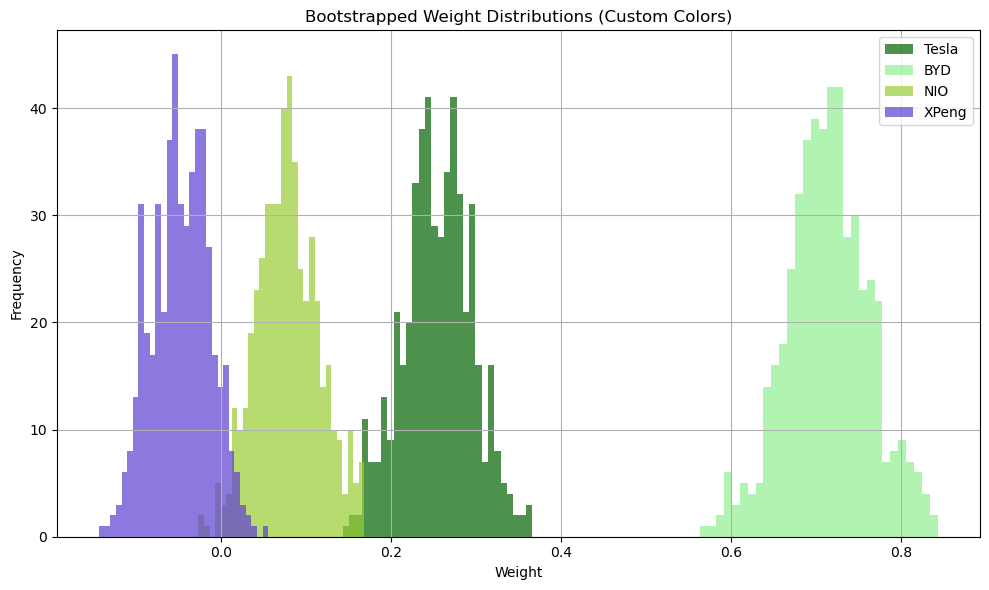

In [56]:
import matplotlib.pyplot as plt

# Custom colors (hex for dark purple)
custom_colors = {
    'Tesla': 'darkgreen',
    'BYD': 'lightgreen',
    'NIO': 'yellowgreen',
    'XPeng': '#5D3FD3'  # HEX code for dark purple
}

# Plot histograms
plt.figure(figsize=(10, 6))
for i, stock in enumerate(combined_returns.columns):
    plt.hist(
        boot_weights[:, i],
        bins=30,
        alpha=0.7,
        label=stock,
        color=custom_colors.get(stock, 'gray')
    )

plt.title("Bootstrapped Weight Distributions (Custom Colors)")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**# Part 2: Trend Prediction Using LSTM** 

**# Goal:** Predict the next 3 months of stock prices (approx. 60 trading days)

**# Method:** Train an LSTM neural network on historical prices for each stock

In [ ]:
# Step 1: Load and Prepare Historical Price Data

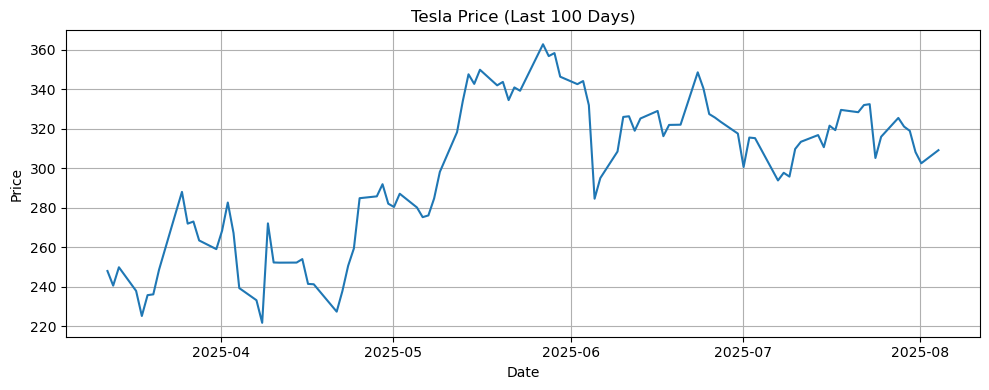

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load enhanced Tesla dataset with indicators
tesla_path = r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Tesla_with_Manual_Indicators.csv"
tesla_df = pd.read_csv(tesla_path)

# Clean and prepare
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df = tesla_df.sort_values('Date')
tesla_df['Price'] = pd.to_numeric(tesla_df['Close'], errors='coerce')  # Use 'Close' price for modeling

# Drop rows with missing price
tesla_df = tesla_df.dropna(subset=['Price'])

# Reset index for sequence modeling
tesla_df = tesla_df.reset_index(drop=True)

# ✅ Optional: Show available columns
# print(tesla_df.columns.tolist())

# Plot last 100 days to inspect the trend
plt.figure(figsize=(10, 4))
plt.plot(tesla_df['Date'][-100:], tesla_df['Price'][-100:])
plt.title("Tesla Price (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


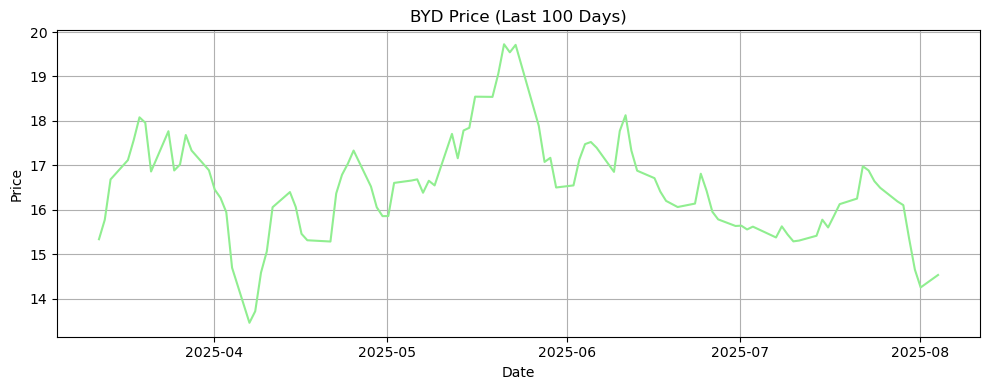

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load enhanced BYD dataset with indicators
byd_path = r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\BYD_with_Manual_Indicators.csv"
byd_df = pd.read_csv(byd_path)

# Clean and prepare
byd_df['Date'] = pd.to_datetime(byd_df['Date'])
byd_df = byd_df.sort_values('Date')
byd_df['Price'] = pd.to_numeric(byd_df['Close'], errors='coerce')  # Use 'Close' as proxy for price
byd_df = byd_df.dropna(subset=['Price'])
byd_df = byd_df.reset_index(drop=True)

# Plot last 100 days
plt.figure(figsize=(10, 4))
plt.plot(byd_df['Date'][-100:], byd_df['Price'][-100:], color='lightgreen')
plt.title("BYD Price (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


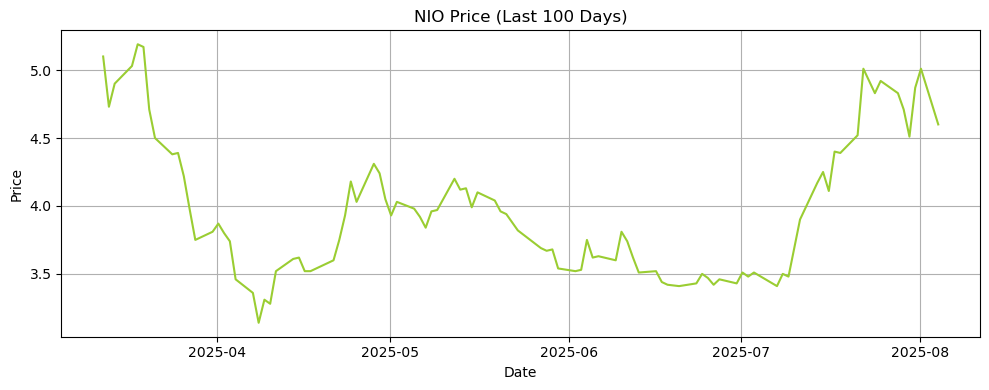

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load enhanced NIO dataset
nio_path = r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\NIO_with_Manual_Indicators.csv"
nio_df = pd.read_csv(nio_path)

# Clean and prepare
nio_df['Date'] = pd.to_datetime(nio_df['Date'])
nio_df = nio_df.sort_values('Date')
nio_df['Price'] = pd.to_numeric(nio_df['Close'], errors='coerce')  # Use 'Close' as price
nio_df = nio_df.dropna(subset=['Price'])
nio_df = nio_df.reset_index(drop=True)

# Plot last 100 days
plt.figure(figsize=(10, 4))
plt.plot(nio_df['Date'][-100:], nio_df['Price'][-100:], color='yellowgreen')
plt.title("NIO Price (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()



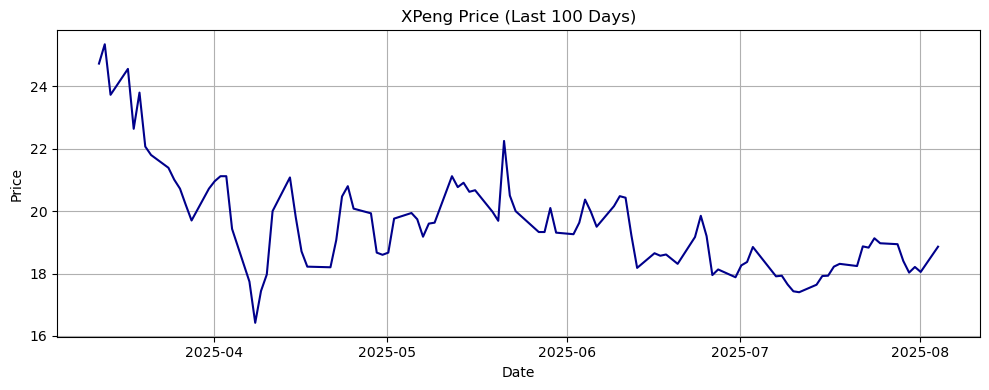

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load enhanced XPeng dataset
xpeng_path = r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\XPeng_with_Manual_Indicators.csv"
xpeng_df = pd.read_csv(xpeng_path)

# Clean and prepare
xpeng_df['Date'] = pd.to_datetime(xpeng_df['Date'])
xpeng_df = xpeng_df.sort_values('Date')
xpeng_df['Price'] = pd.to_numeric(xpeng_df['Close'], errors='coerce')  # Use 'Close' as price
xpeng_df = xpeng_df.dropna(subset=['Price'])
xpeng_df = xpeng_df.reset_index(drop=True)

# Plot last 100 days
plt.figure(figsize=(10, 4))
plt.plot(xpeng_df['Date'][-100:], xpeng_df['Price'][-100:], color='darkblue')
plt.title("XPeng Price (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Step 2: Normalize Prices and Create LSTM Input Sequences

**# We'll use:**

- MinMaxScaler to normalize price data between 0 and 1

- A sliding window of 60 days to create input sequences for LSTM

- Separate X (inputs) and y (targets)

In [ ]:
# Normalize & Create Sequences (Reusable Function)

Use this once per stock — I’ll first give you the reusable function, then show how to apply it to Tesla.

In [ ]:
# Function to Normalize and Create Sequences

In [68]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Function to normalize and build 60-day input/output sequences
def prepare_lstm_data(df, feature_col='Close', window_size=60):
    """
    Prepares LSTM-compatible input and output data from stock prices.

    Parameters:
    - df: DataFrame containing at least a 'Close' column.
    - feature_col: Column name to use for price (default: 'Close').
    - window_size: Number of days in the LSTM input sequence.

    Returns:
    - X: 3D NumPy array of input sequences (samples, timesteps, features)
    - y: 2D NumPy array of target prices
    - scaler: fitted MinMaxScaler for inverse transformation
    """
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[[feature_col]])

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i - window_size:i])
        y.append(scaled_data[i])

    X, y = np.array(X), np.array(y)
    return X, y, scaler


In [ ]:
# 01: Prepare LSTM Data

In [70]:
# Tesla
X_tesla, y_tesla, scaler_tesla = prepare_lstm_data(tesla_df, feature_col='Close', window_size=5)
print(f"Tesla sequences: X={X_tesla.shape}, y={y_tesla.shape}")

# BYD
X_byd, y_byd, scaler_byd = prepare_lstm_data(byd_df, feature_col='Close', window_size=5)
print(f"BYD sequences: X={X_byd.shape}, y={y_byd.shape}")

# NIO
X_nio, y_nio, scaler_nio = prepare_lstm_data(nio_df, feature_col='Close', window_size=5)
print(f"NIO sequences: X={X_nio.shape}, y={y_nio.shape}")

# XPeng
X_xpeng, y_xpeng, scaler_xpeng = prepare_lstm_data(xpeng_df, feature_col='Close', window_size=5)
print(f"XPeng sequences: X={X_xpeng.shape}, y={y_xpeng.shape}")


Tesla sequences: X=(495, 5, 1), y=(495, 1)
BYD sequences: X=(492, 5, 1), y=(492, 1)
NIO sequences: X=(495, 5, 1), y=(495, 1)
XPeng sequences: X=(495, 5, 1), y=(495, 1)


In [ ]:
# Step 3: Build and Train the LSTM Model 

**# We’ll use:**

- A simple LSTM model with 2 layers

- MSE loss, Adam optimizer

- 50 epochs (We can increase this later if desired)

In [ ]:
# 01 – LSTM Model for Tesla

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# LSTM Model for Tesla
model_tesla = Sequential()
model_tesla.add(Input(shape=(X_tesla.shape[1], X_tesla.shape[2])))  # Automatically adapts to shape (5, 1)
model_tesla.add(LSTM(units=50, return_sequences=True))
model_tesla.add(LSTM(units=50))
model_tesla.add(Dense(units=1))  # Output layer for regression

# Compile the model
model_tesla.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_tesla = model_tesla.fit(
    X_tesla,
    y_tesla,
    epochs=50,
    batch_size=4,
    verbose=1
)



Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0343
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 15/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [ ]:
**# Forecast the Next 60 Trading Days for Tesla**

**# We'll:**

- Start with the last 5 known prices (the last window)

- Predict 1 day ahead

- Append the prediction and slide the window forward

- Repeat for 60 steps

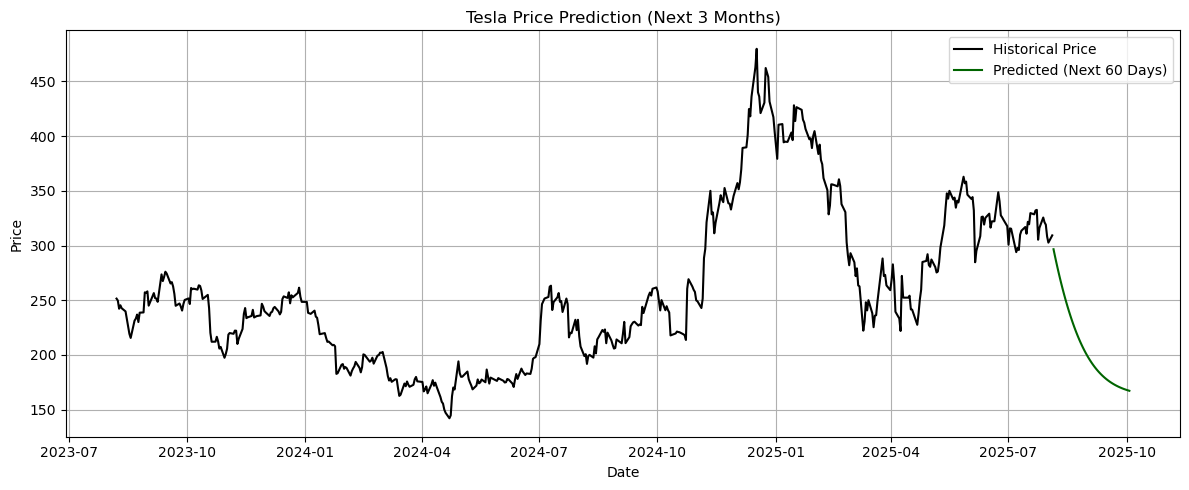

In [74]:
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

# Start with the last known sequence
last_sequence = X_tesla[-1]  # shape: (5, 1)
future_predictions = []

# Predict next 60 steps
for _ in range(60):
    pred = model_tesla.predict(last_sequence.reshape(1, 5, 1), verbose=0)
    future_predictions.append(pred[0, 0])
    
    # Slide the window forward
    last_sequence = np.append(last_sequence[1:], pred[0, 0]).reshape(5, 1)

# Inverse transform predictions back to price scale
predicted_prices = scaler_tesla.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Build date range for future predictions
last_date = tesla_df['Date'].iloc[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 61)]

# Plot historical + predicted prices
plt.figure(figsize=(12, 5))
plt.plot(tesla_df['Date'], tesla_df['Price'], label="Historical Price", color="black")
plt.plot(future_dates, predicted_prices, label="Predicted (Next 60 Days)", color="darkgreen")
plt.title("Tesla Price Prediction (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# 02 BYD Forecasting & Plotting (Dark Green)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# LSTM Model for BYD
model_byd = Sequential()
model_byd.add(Input(shape=(X_byd.shape[1], X_byd.shape[2])))  # Shape (5, 1)
model_byd.add(LSTM(units=50, return_sequences=True))
model_byd.add(LSTM(units=50))
model_byd.add(Dense(units=1))  # Output layer for regression

# Compile the model
model_byd.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_byd = model_byd.fit(
    X_byd,
    y_byd,
    epochs=50,
    batch_size=4,
    verbose=1
)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0355
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 15/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

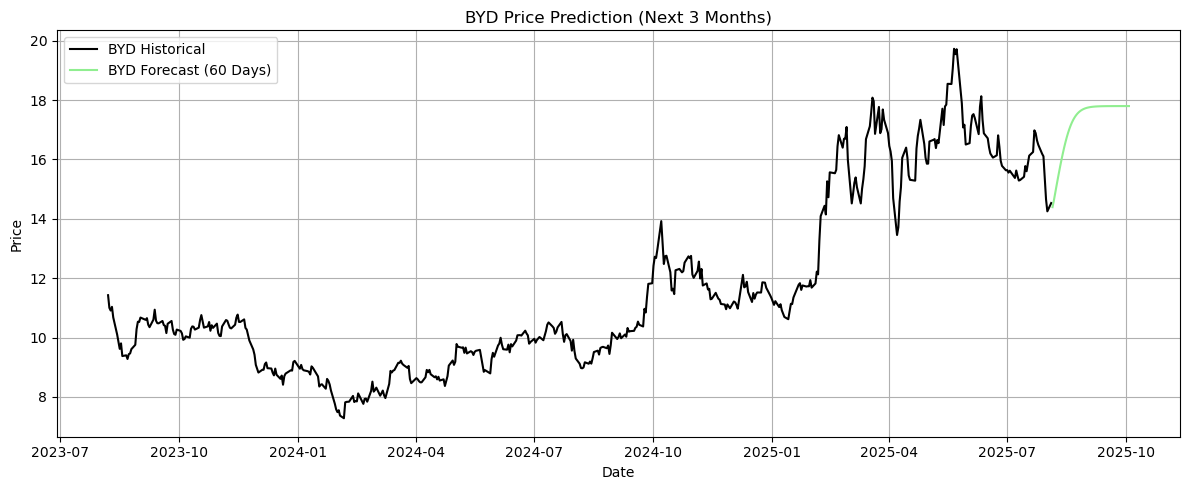

In [82]:
# Start with last BYD sequence
last_sequence_byd = X_byd[-1]
future_predictions_byd = []

# Predict next 60 days using BYD model
for _ in range(60):
    pred = model_byd.predict(last_sequence_byd.reshape(1, 5, 1), verbose=0)
    future_predictions_byd.append(pred[0, 0])
    last_sequence_byd = np.append(last_sequence_byd[1:], pred[0, 0]).reshape(5, 1)

# Inverse transform to original price scale
predicted_prices_byd = scaler_byd.inverse_transform(np.array(future_predictions_byd).reshape(-1, 1))

# Generate future date range
future_dates_byd = [byd_df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, 61)]

# Plot historical + predicted prices
plt.figure(figsize=(12, 5))
plt.plot(byd_df['Date'], byd_df['Price'], label="BYD Historical", color="black")
plt.plot(future_dates_byd, predicted_prices_byd, label="BYD Forecast (60 Days)", color="lightgreen")
plt.title("BYD Price Prediction (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# 03 NIO Forecasting & Plotting (Yellow Green)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# LSTM Model for NIO
model_nio = Sequential()
model_nio.add(Input(shape=(X_nio.shape[1], X_nio.shape[2])))  # Shape (5, 1)
model_nio.add(LSTM(units=50, return_sequences=True))
model_nio.add(LSTM(units=50))
model_nio.add(Dense(units=1))  # Output layer for regression

# Compile the model
model_nio.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_nio = model_nio.fit(
    X_nio,
    y_nio,
    epochs=50,
    batch_size=4,
    verbose=1
)


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0212
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8534e-04
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010  
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3276e-04
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6681e-04
Epoch 15/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0

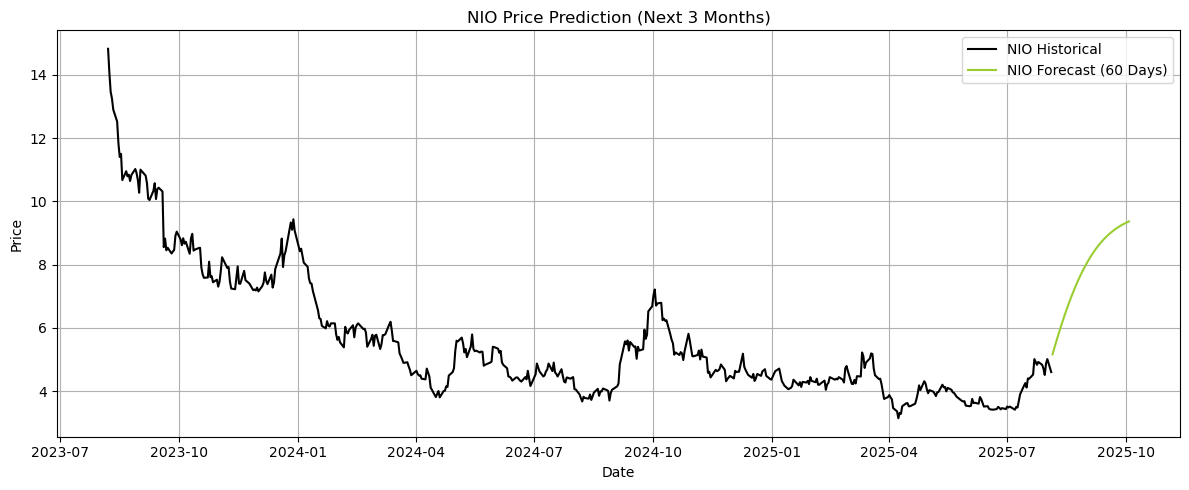

In [86]:
from datetime import timedelta

# Start with last NIO sequence
last_sequence_nio = X_nio[-1]
future_predictions_nio = []

# Predict next 60 days using NIO model
for _ in range(60):
    pred = model_nio.predict(last_sequence_nio.reshape(1, 5, 1), verbose=0)
    future_predictions_nio.append(pred[0, 0])
    last_sequence_nio = np.append(last_sequence_nio[1:], pred[0, 0]).reshape(5, 1)

# Inverse scale the predictions
predicted_prices_nio = scaler_nio.inverse_transform(np.array(future_predictions_nio).reshape(-1, 1))

# Create future date range
future_dates_nio = [nio_df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, 61)]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(nio_df['Date'], nio_df['Price'], label="NIO Historical", color="black")
plt.plot(future_dates_nio, predicted_prices_nio, label="NIO Forecast (60 Days)", color="yellowgreen")
plt.title("NIO Price Prediction (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 04  XPeng Forecasting & Plotting (Dark Purple)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# LSTM Model for XPeng
model_xpeng = Sequential()
model_xpeng.add(Input(shape=(X_xpeng.shape[1], X_xpeng.shape[2])))  # Shape (5, 1)
model_xpeng.add(LSTM(units=50, return_sequences=True))
model_xpeng.add(LSTM(units=50))
model_xpeng.add(Dense(units=1))  # Output layer for regression

# Compile the model
model_xpeng.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_xpeng = model_xpeng.fit(
    X_xpeng,
    y_xpeng,
    epochs=50,
    batch_size=4,
    verbose=1
)


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0380
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 15/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

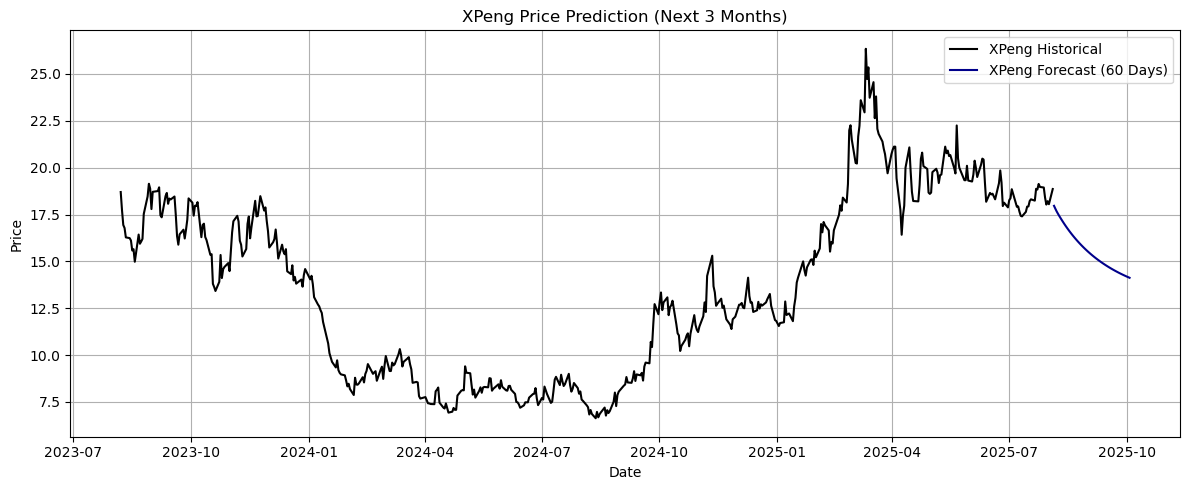

In [90]:
from datetime import timedelta

# Start with the last known XPeng sequence
last_sequence_xpeng = X_xpeng[-1]
future_predictions_xpeng = []

# Predict the next 60 trading days using XPeng's LSTM model
for _ in range(60):
    pred = model_xpeng.predict(last_sequence_xpeng.reshape(1, 5, 1), verbose=0)
    future_predictions_xpeng.append(pred[0, 0])
    last_sequence_xpeng = np.append(last_sequence_xpeng[1:], pred[0, 0]).reshape(5, 1)

# Inverse scale predictions
predicted_prices_xpeng = scaler_xpeng.inverse_transform(np.array(future_predictions_xpeng).reshape(-1, 1))

# Generate future dates
future_dates_xpeng = [xpeng_df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, 61)]

# Plot forecast vs historical
plt.figure(figsize=(12, 5))
plt.plot(xpeng_df['Date'], xpeng_df['Price'], label="XPeng Historical", color="black")
plt.plot(future_dates_xpeng, predicted_prices_xpeng, label="XPeng Forecast (60 Days)", color="darkblue")
plt.title("XPeng Price Prediction (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
These examples reuse the Tesla model for simplicity.